In [82]:
#importing necessary tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from scipy.stats.mstats import trimmed_var

In [93]:
#function for loading and filtering columns based on our requirment
def wrangle(filepath):
  df=pd.read_csv(filepath,index_col='Customer Id')
  mask=df['Income']<100
  df=df[mask]
  return df

In [94]:
df=wrangle("/content/drive/MyDrive/Customer segmentation /Customer_Segmentation.csv")

In [76]:
df.tail()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9
850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6


In [27]:
# how many unique categories are in hear    
df.select_dtypes('object').nunique()

Address    31
dtype: int64

In [28]:
#check for missing value in our columns
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          135
Address              0
DebtIncomeRatio      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c9db5510>]],
      dtype=object)

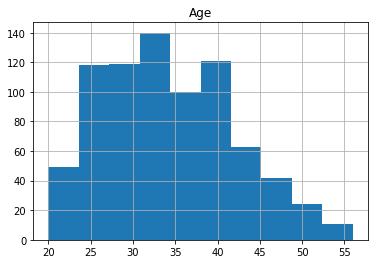

In [29]:
#histogram of age ,distribution of our age column
df.hist(['Age'],bins=10)

In [30]:
# finding mean,median,...for all umerical columns
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,652.000000,787.000000
mean,427.318933,34.278272,1.672173,7.645489,38.421855,1.329532,2.632489,0.268405,10.250445
std,245.615664,7.755328,0.897707,5.883311,19.261491,1.582987,2.515123,0.443470,6.734429
min,1.000000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,214.500000,28.000000,1.000000,3.000000,24.000000,0.365500,1.002000,0.000000,5.200000
50%,427.000000,34.000000,1.000000,7.000000,33.000000,0.827000,1.848000,0.000000,8.900000
75%,638.500000,39.000000,2.000000,11.500000,48.500000,1.698000,3.369000,1.000000,13.950000
max,850.000000,56.000000,5.000000,28.000000,99.000000,15.017000,20.616000,1.000000,41.300000


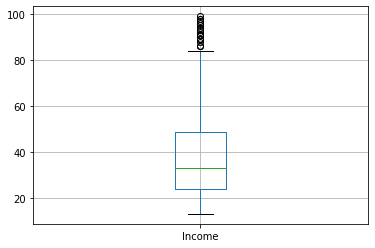

In [31]:
#we can still see some outliers in our income data.
df.boxplot(column=['Income'])

In [39]:
cols=['Other Debt','Defaulted','DebtIncomeRatio','Income','Card Debt']
corr=df[cols].corr()
corr

,Other Debt,Defaulted,DebtIncomeRatio,Income,Card Debt
Other Debt,1.000000,0.153753,0.701572,0.528036,0.551426
Defaulted,0.153753,1.000000,0.374764,-0.124082,0.237245
DebtIncomeRatio,0.701572,0.374764,1.000000,0.018226,0.615355
Income,0.528036,-0.124082,0.018226,1.000000,0.445212
Card Debt,0.551426,0.237245,0.615355,0.445212,1.000000


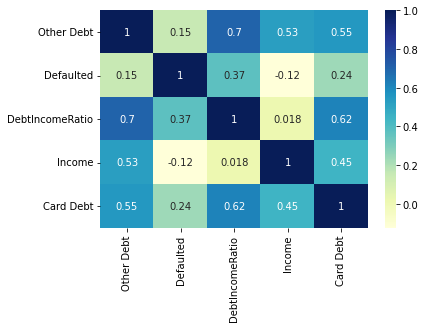

In [42]:
#visualizing corrlation
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True);
dataplot

#Scatterplot 

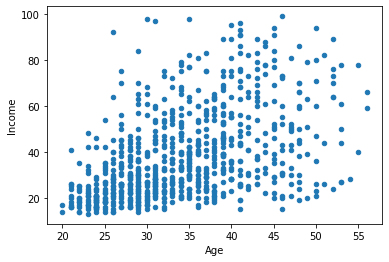

In [43]:
#scatter plot age vs income
df.plot.scatter(x="Age",y="Income");

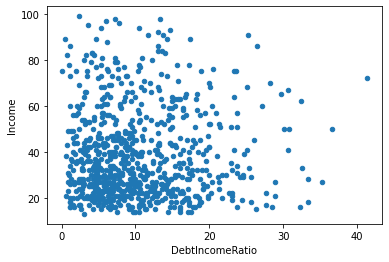

In [45]:
# scatter plot between debtIncomeratio vs income
df.plot.scatter(x="DebtIncomeRatio",y="Income");

#clustering based on 2 features

In [46]:
#first split our data
X =  df[["Income","DebtIncomeRatio"]]
print(X.shape)
X.head()

(787, 2)


,Income,DebtIncomeRatio
0,19,6.3
2,57,20.9
3,19,6.3
5,81,10.9
6,56,1.6


In [51]:
# Build model
model = KMeans(n_clusters=3,random_state=42)
# Fit model to data
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [52]:
#extractin the labels
labels = model.labels_
labels[:10]

array([0, 1, 0, 2, 1, 2, 0, 2, 1, 0], dtype=int32)

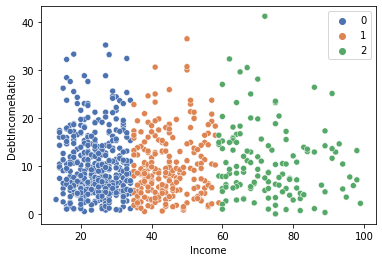

In [53]:
# Plot "HOUSES" vs "DEBT" with hue=label
sns.scatterplot(x=df["Income"],y=df["DebtIncomeRatio"],hue=labels,palette="deep"
               
               )

In [54]:
#adding the extracting the centroid
centroids = model.cluster_centers_
centroids

array([[24.14251781, 10.1935867 ],
       [44.48290598,  9.98931624],
       [73.21969697, 10.89469697]])

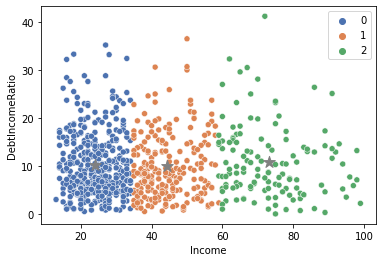

In [55]:
#adding the center in our scatterplot
sns.scatterplot(x=df["Income"],y=df["DebtIncomeRatio"],hue=labels,palette="deep")
plt.scatter(x=centroids[:,0],y=centroids[:,1],
           marker="*",color="gray",s=150 )

the above looks cool but as a data analyst we need some more concrete calculation to validate our model peroformamce

#Metrics for clustering

In [56]:
#extracting inertia from the model
inertia = model.inertia_
print("Inertia (3 clusters):", inertia)

Inertia (3 clusters): 72909.49160548937


In [58]:
#calculating just to make sure 
ss = silhouette_score(X,model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.4648013887128457


we want our inertia as close as 0 but ours is so big but this does't mean our model is bad since our datas like income and DebtIncomeRatio values are high it is expected .so to make sure this we also find our
silhouette_score gegerally we want it be as close as 1 .so what could be the problem? oour k value so we need to try some k values and decide which gives best result.



In [59]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #build model
    model=KMeans(n_clusters=k,random_state=42)
    #train model
    model.fit(X)
    #calculate inertia
    inertia_errors.append(model.inertia_)
    # calculate schil
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [116920.40872002495, 72909.49160548937, 57027.81091810929]

Silhouette Scores: [0.5834002742630278, 0.4648013887128457, 0.4187048062809877]


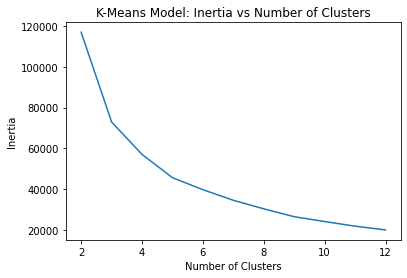

In [64]:
#inertia with n_clusters
plt.plot(n_clusters,inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs Number of Clusters");

Text(0.5, 1.0, 'K-Means Model:Silhouette Score vs number of clusters')

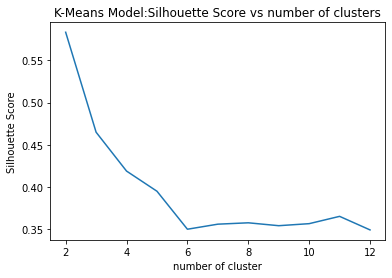

In [65]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
plt.xlabel("number of cluster")
plt.ylabel("Silhouette Score")
plt.title("K-Means Model:Silhouette Score vs number of clusters")

well from the above 2 plots we can say that k=5 could be our optimal point.

In [66]:
# Build model
final_model = KMeans(n_clusters=5,random_state=42)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=5, random_state=42)

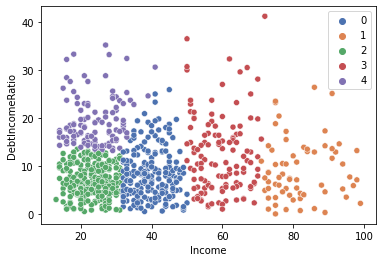

In [67]:
# Plot "HOUSES" vs "DEBT" with hue=final model
sns.scatterplot(x=df["Income"],y=df["DebtIncomeRatio"],hue=final_model.labels_,palette="deep")

In [68]:
#dataframe that has mean value for both datas
xgb = X.groupby(final_model.labels_).mean()
xgb

,Income,DebtIncomeRatio
0,39.812207,8.555399
1,81.835821,9.168657
2,23.018248,7.128467
3,59.430894,12.499187
4,24.163636,19.453636


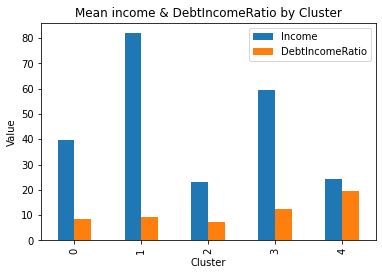

In [71]:
#visualizing the above
xgb.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value")
plt.title("Mean income & DebtIncomeRatio by Cluster");

we can say the proportion of income to DeptincomeRatio vlaue in cluster 1 and 3 is not proportional and we can see extream high income which explains why thair DIR is low aferall DIR is output of total dept/gross income 'so as our income increases the DIR values become less.

#Clustering with more than 2 features


In [80]:
# Calculate variance, get 5 largest features
top_five_var = df.var().sort_values().tail(5)
top_five_var

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Other Debt           6.325846
Years Employed      34.613348
DebtIncomeRatio     45.352528
Age                 60.145113
Income             371.005018
dtype: float64

In [81]:
# #creating horizontal bar chart just visualize the above
fig = px.bar(
    x=top_five_var,
    y=top_five_var.index,
    title="SCF:High Variance Features",
    )
fig.update_layout(xaxis_title="Variance",yaxis_title="Feature")

fig.show()

In [95]:
high_var_cols = top_five_var.tail(5).index.to_list()
high_var_cols

['Other Debt', 'Years Employed', 'DebtIncomeRatio', 'Age', 'Income']

In [96]:
#Split
X = df[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (787, 5)


,Other Debt,Years Employed,DebtIncomeRatio,Age,Income
Customer Id,,,,,
1,1.073,6,6.3,41,19
3,5.802,10,20.9,33,57
4,0.516,4,6.3,29,19
6,7.831,23,10.9,40,81
7,0.454,4,1.6,38,56


now we do couple of changes 
1.USE StandardScaller for scalling our data
2.USE make-pipline from skklearn to organize our code and model bulding steps.

In [98]:
n_clusters = range(2,12)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #train model
    model= make_pipeline(StandardScaler(),KMeans(n_clusters=k,random_state=42))
    #fiting model
    model.fit(X)
    #adding inertia value to my list
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    # adding silhoutte score
    silhouette_scores.append(model.named_steps['kmeans'].labels_)

print("Inertia:", inertia_errors[0])
print()
print("Silhouette Scores:", silhouette_scores[0])

Inertia: 2615.2862983051355

Silhouette Scores: [0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1
 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1

In [99]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=inertia_errors,
    title="K-Means Model: Inertia vs Number of Clusters",
    )
fig.update_layout(xaxis_title="Number of clusters (k)",yaxis_title="Inertia")

fig.show()

In [102]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=4,random_state=42)
)
final_model.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [103]:
labels = final_model.named_steps['kmeans'].labels_
print(labels[:5])

[3 2 3 2 0]


In [104]:
xgb = X.groupby(labels).mean()
xgb

,Other Debt,Years Employed,DebtIncomeRatio,Age,Income
0,2.284748,13.109524,6.781429,40.385714,54.204762
1,3.349013,4.214765,18.112752,32.241611,28.268456
2,8.125718,13.035294,19.097647,39.494118,64.117647
3,1.172837,4.454810,6.766472,30.131195,26.801749


In [106]:
fig = px.bar(
    xgb,
    barmode="group"
    
)
fig.update_layout(xaxis_title='clusters',yaxis_title='Value')
fig.show()

since we have 5 features we can't use scatterplot so what we do is we have to decrease our dimension from 5 to 2 using Principal Component Analysis(PCA)

In [107]:
# Instantiate transformer
pca = PCA(n_components=2,random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (787, 2)


,PC1,PC2
0,-17.575161,-5.383564
1,18.228399,11.346792
2,-20.555295,-3.699143
3,45.257607,0.792166
4,16.624198,-8.601595


In [108]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x="PC1"
    ,y="PC2"
    ,color=labels.astype(str)
    ,title="PCA Representation of Cluster"
)
fig.update_layout(xaxis_title='PC1',yaxis_title='PC2')
fig.show()